In [1]:
"""
States:
0  1  2  3  4  5  6  7  8  9  10 11  
12 13 14 15 16 17 18 19 20 21 22 23
24 25 26 27 28 29 30 31 32 33 34 35
36 -------------37-------------- 38

Actions:
1: Right, -1: Left, 12: Down, -12: Up

"""
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class CliffWalking:
    q = np.zeros((39,4)) #state action values
    epsilon = 0.1
    
    def __init__(self):
        self.q=np.zeros((39,4))
        self.epsilon=0.1
    
    def map_action(self,a):
        if(a==0):
            return 1
        if(a==1):
            return -1
        if(a==2):
            return 12
        if(a==3):
            return -12
        
    def demap_action(self,a):
        if(a==1):
            return 0
        if(a==-1):
            return 1
        if(a==12):
            return 2
        if(a==-12):
            return 3
    
    def get_action(self,s):
        rand_num=np.random.uniform(0,1)
        if(rand_num>self.epsilon):
            return self.map_action(self.q[s].argmax())
        else:
            return self.map_action(np.random.randint(0,4))
    
    def get_next_state_and_reward(self,s,a=None):
        if(s==37):
            s=36
        if(a==None):
            a=self.get_action(s)
        s_=None
        r=-1
        if(s>=0 and s<=11 and a==-12):
            s_=s
        elif(s%12==0 and a==-1):
            s_=s
        elif((s+1)%12==0 and a==1):
            s_=s
        elif(s==38 and a==1):
            s_=s
        elif((s==36 or s==38) and a==12):
            s_=s
        else:
            if(s>=25 and s<=34 and a==12):
                r=-100
                s_=37
            elif(s==35 and a==12):
                s_=38
            elif(s==36 and a==1):
                r=-100
                s_=37
            elif(s==38 and a==-1):
                r=-100
                s_=37
            else:
                s_=s+a
        if(s_==37):
            s_=36
        return (s_,r)
    
    def SARSA(self,alpha,iters):
        runs=100
        rewards=np.zeros(iters)
        for run in range(runs):
            self.__init__()
            for ep in range(iters):
                s=36
                a= self.get_action(s)
                while(s!=38):
                    s_,r=self.get_next_state_and_reward(s,a)
                    rewards[ep]+=r
                    a_=self.get_action(s_)
                    self.q[s,self.demap_action(a)]=self.q[s,self.demap_action(a)]+alpha*(r+self.q[s_,self.demap_action(a_)]-self.q[s,self.demap_action(a)])
                    s=s_
                    a=a_
        return rewards/runs
                
    def QLearning(self,alpha,iters):
        runs=100
        rewards=np.zeros(iters)
        for run in range(runs):
            self.__init__()
            for ep in range(iters):
                s=36
                while(s!=38):
                    a= self.get_action(s)
                    s_,r=self.get_next_state_and_reward(s,a)
                    rewards[ep]+=r
                    a_=self.get_action(s_)
                    mx=np.inf*-1
                    for action in range(4):
                        if(self.q[s_,action]>mx):
                            mx=self.q[s_,action]
                    self.q[s,self.demap_action(a)]=self.q[s,self.demap_action(a)]+alpha*(r+mx-self.q[s,self.demap_action(a)])
                    s=s_
        return rewards/runs
    
    def plot(self,rewards1,rewards2,iters):
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(111)
        ax1.plot(np.arange(0,iters),rewards1)
        ax1.plot(np.arange(0,iters),rewards2)
        ax1.legend(["SARSA","Q Learning"])
        ax1.set_ylabel('Sum of rewards during episode')
        ax1.set_xlabel('Episodes')
        ax1.set_ylim(bottom=-100,top=0)
        plt.show()

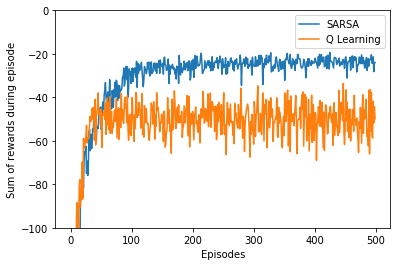

In [12]:
cw= CliffWalking()
cw.plot(cw.SARSA(0.3,500),cw.QLearning(0.5,500),500)